# LOAD DATASET
----------------

In [1]:
import pandas as pd

data = pd.read_csv("Modified_SQL_Dataset.csv")

print( data )

                                                   Query  Label
0                      " or pg_sleep  (  __TIME__  )  --      1
1      create user name identified by pass123 tempora...      1
2       AND 1  =  utl_inaddr.get_host_address   (    ...      1
3       select * from users where id  =  '1' or @ @1 ...      1
4       select * from users where id  =  1 or 1#"  ( ...      1
...                                                  ...    ...
30914              DELETE FROM door WHERE grow = 'small'      0
30915                               DELETE FROM tomorrow      0
30916                       SELECT wide ( s )  FROM west      0
30917       SELECT * FROM  ( SELECT slide FROM breath )       0
30918                           SELECT TOP 3 * FROM race      0

[30919 rows x 2 columns]


In [2]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Query   30919 non-null  object
 1   Label   30919 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 483.2+ KB


In [3]:
data.shape

(30919, 2)

In [4]:
data.describe()

,Label
count,30919.000000
mean,0.368123
std,0.482303
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
data.isnull()

,Query,Label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
30914,False,False
30915,False,False
30916,False,False
30917,False,False


In [6]:
data.isnull().sum()

Query    0
Label    0
dtype: int64

In [7]:
data.head()

,Query,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


# DATA ENCODING
------------------------------

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction with TF-IDF Vectorizer
vectorizer = TfidfVectorizer(   max_features=10000 )  #Limit features to reduce memory usage
X = vectorizer.fit_transform(data["Query"])  # Large sparse matrix

print( X )

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 189923 stored elements and shape (30919, 10000)>
  Coords	Values
  (0, 7760)	0.3051412280606954
  (0, 7944)	0.5768173916597856
  (0, 4522)	0.7577404091220238
  (1, 5451)	0.23242907816713101
  (1, 9362)	0.26222841459250823
  (1, 7501)	0.22445798538124942
  (1, 6663)	0.31112599963201876
  (1, 5082)	0.11879977874572478
  (1, 7876)	0.30238570682955906
  (1, 8992)	0.646889500904953
  (1, 9046)	0.2900669560091013
  (1, 5591)	0.31112599963201876
  (1, 9367)	0.1583586159100032
  (2, 4690)	0.18772513319655698
  (2, 9375)	0.22518992082321682
  (2, 6319)	0.22518992082321682
  (2, 8576)	0.1101712003084891
  (2, 5664)	0.3875724545903967
  (2, 8990)	0.534783867528797
  (2, 6233)	0.12738539250008696
  (2, 8436)	0.25093827313298933
  (2, 4755)	0.11596216885902554
  (2, 7100)	0.36856442747025414
  (2, 8958)	0.27391999899396685
  (2, 4660)	0.3235565870963862
  :	:
  (30912, 8784)	0.4175398174222651
  (30913, 8576)	0.17432994806123042
  (30913

In [9]:
y = data["Label"]

In [10]:
print(X)
print( y )

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 189923 stored elements and shape (30919, 10000)>
  Coords	Values
  (0, 7760)	0.3051412280606954
  (0, 7944)	0.5768173916597856
  (0, 4522)	0.7577404091220238
  (1, 5451)	0.23242907816713101
  (1, 9362)	0.26222841459250823
  (1, 7501)	0.22445798538124942
  (1, 6663)	0.31112599963201876
  (1, 5082)	0.11879977874572478
  (1, 7876)	0.30238570682955906
  (1, 8992)	0.646889500904953
  (1, 9046)	0.2900669560091013
  (1, 5591)	0.31112599963201876
  (1, 9367)	0.1583586159100032
  (2, 4690)	0.18772513319655698
  (2, 9375)	0.22518992082321682
  (2, 6319)	0.22518992082321682
  (2, 8576)	0.1101712003084891
  (2, 5664)	0.3875724545903967
  (2, 8990)	0.534783867528797
  (2, 6233)	0.12738539250008696
  (2, 8436)	0.25093827313298933
  (2, 4755)	0.11596216885902554
  (2, 7100)	0.36856442747025414
  (2, 8958)	0.27391999899396685
  (2, 4660)	0.3235565870963862
  :	:
  (30912, 8784)	0.4175398174222651
  (30913, 8576)	0.17432994806123042
  (30913

In [11]:
print( X.shape )
print( y.shape )


(30919, 10000)
(30919,)


# DATA SPLITING
------------------------

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  stratify = y  , random_state=42)


print("X_train:\n", X_train)
#print("X_test:\n", X_test)
print("y_train:\n", y_train)
#print("y_test:\n", y_test)

X_train:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 151271 stored elements and shape (24735, 10000)>
  Coords	Values
  (0, 8576)	0.12418019626199145
  (0, 6233)	0.14358328671447468
  (0, 5423)	0.2859856197785436
  (0, 5061)	0.6695115244052301
  (0, 6521)	0.6587333774760995
  (1, 4690)	0.118600798074823
  (1, 8576)	0.06960385143403718
  (1, 9623)	0.10411395786553027
  (1, 8702)	0.20570689388034769
  (1, 1623)	0.9632933676452037
  (2, 8576)	0.18759908579958884
  (2, 6233)	0.108455672218889
  (2, 4801)	0.28755556336008076
  (2, 8910)	0.3183229083187052
  (2, 8648)	0.5057157006167228
  (2, 7303)	0.5222952284428762
  (2, 9011)	0.4903933101974744
  (5, 8576)	0.10265760819220601
  (5, 6233)	0.11869780556141102
  (5, 9623)	0.1535560126874364
  (5, 4859)	0.5534735313797811
  (5, 6096)	0.5759252068427105
  (5, 5051)	0.5601517683519996
  (6, 8576)	0.12408662697188898
  (6, 6233)	0.14347509727193178
  :	:
  (24725, 7738)	0.3754669971199596
  (24725, 7999)	0.6709860268776349
  (

In [13]:
print( X_train.shape )
print( y_train.shape )
print( X_test.shape  )
print( y_test.shape  )

(24735, 10000)
(24735,)
(6184, 10000)
(6184,)


# MODEL SELECTION AND TRAINING
----------------------------------------

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

y_train = y_train.values.ravel()
model.fit( X_train , y_train )

LogisticRegression()

In [15]:
y_pred = model.predict(X_test)

# MODEL EVALUATION
----------------------------

In [16]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", (  accuracy_score(y_test, y_pred) ) * 100 )
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 95.35899094437258
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      3908
           1       0.98      0.89      0.93      2276

    accuracy                           0.95      6184
   macro avg       0.96      0.94      0.95      6184
weighted avg       0.95      0.95      0.95      6184



# CONFUSION MATRIX
-----------------------

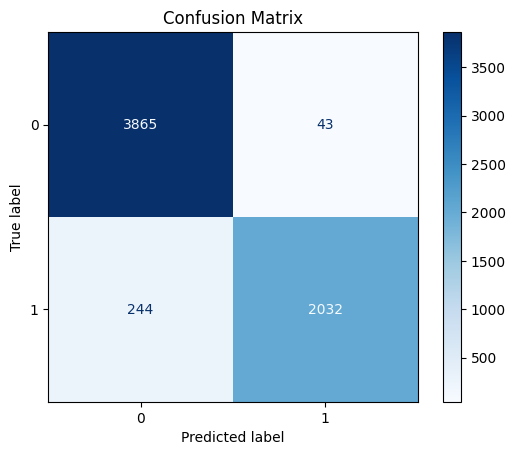

In [17]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
actual = y_test
predicted = y_pred

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# MODEL PREDICTION
-----------------------

In [23]:

# EXAMPLES
# "SELECT * FROM users WHERE username = '' OR '1'='1' AND password = '';"
# SELECT id, name, email FROM customers WHERE id = '' UNION SELECT NULL, username, password FROM users --';
# ' UNION SELECT NULL, NULL, @@version --
# '; DROP TABLE users; --
# SELECT * FROM STUDENT ;

single_query = [ "SELECT * FROM users WHERE username = 'admin' --' AND password = '';" ]

# Preprocess the single URL using the same TF-IDF vectorizer
single_query_transformed = vectorizer.transform(single_query)

# Predict using the trained model
prediction = model.predict(single_query_transformed)

# Output the result
print(f"MODEL_PREDICTION  : { prediction[0] }")
if prediction[0] == 1 :
    print(f"SQL_Injection     : True ")
else:
    print(f"SQL_Injection     : False ")


MODEL_PREDICTION  : 1
SQL_Injection     : True 


# DATA  Visualization
------------------------------

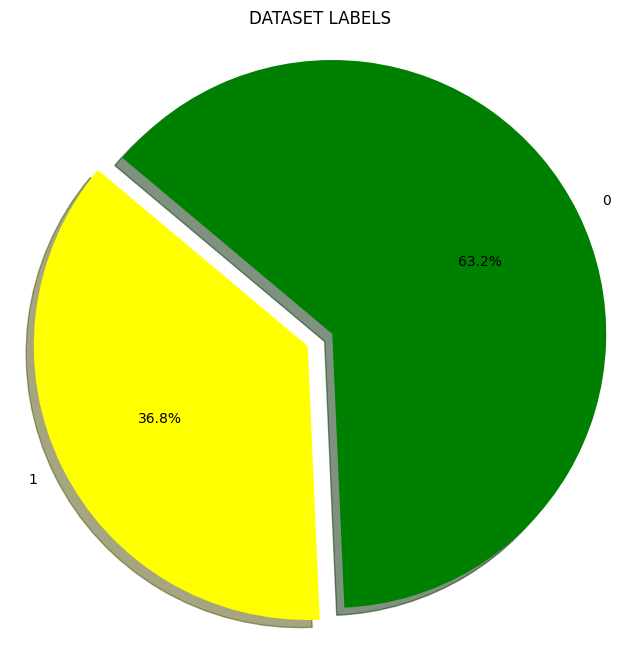

In [19]:
import matplotlib.pyplot as plt

noones  =  list( data["Label"] ).count(1)
nozeros =  list( data["Label"] ).count(0)

labels = ['1', '0']
sizes = [ noones , nozeros ]  # Percentage of each segment
colors = ['yellow', 'green']  # Colors for each segment
explode = (0.1, 0)  # Explode a slice (optional, e.g., "explode" the first slice)

# Plot
plt.figure(figsize=(8, 8))  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title("DATASET LABELS")  
plt.axis('equal')  
plt.show()


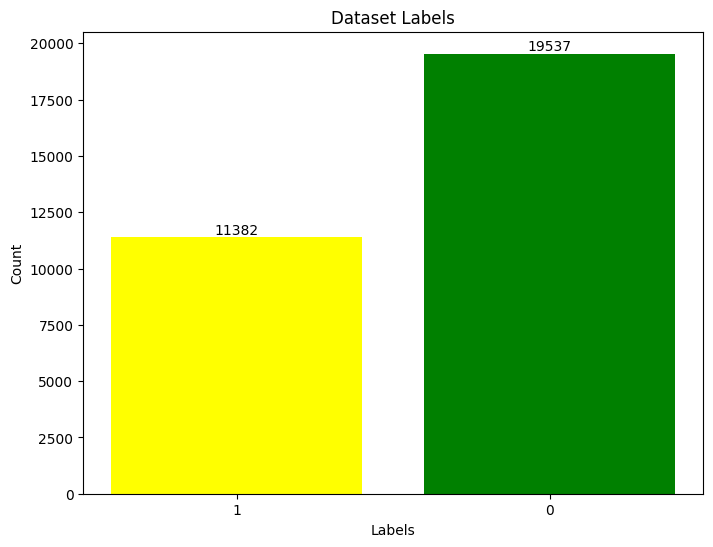

In [20]:
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame
noones  = list(data["Label"]).count(1)
nozeros = list(data["Label"]).count(0)

# Data for the bar chart
labels = ['1', '0']
counts = [noones, nozeros]  # Values corresponding to the labels
colors = ['yellow', 'green']  # Colors for each bar

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Dataset Labels')

# Show values on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# Show the bar chart
plt.show()


# ROC Curve (Receiver Operating Characteristic): Analyze classification model performance
--------------------------------------------------------------------------------------------------

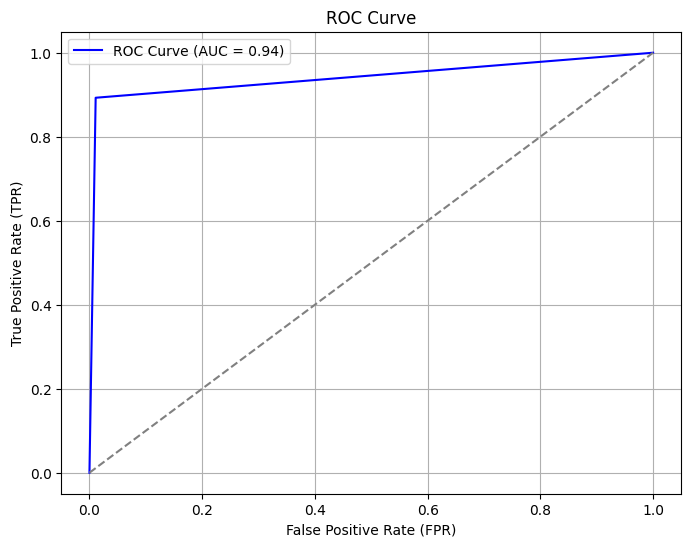

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred )
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


# Precision-Recall Curve: Compare precision and recall trade-offs
-----------------------------------------------------------------------

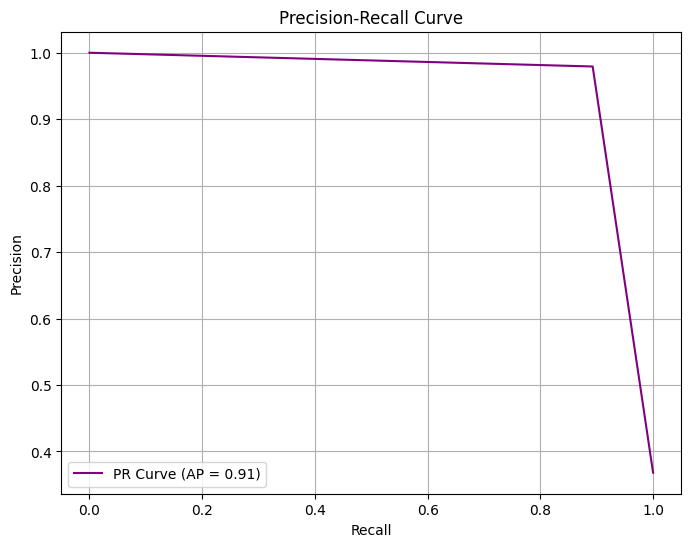

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred )
avg_precision = average_precision_score(y_test, y_pred )

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()
